# Lead Scoring Case Study

## Problem Statement 
The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with the higher lead score have a higher conversion chance and the customers with the lower lead score have a lower conversion chance 

# Step 1: Importing and Cleaning Data

In [1]:
## Importing useful Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset
lead_df = pd.read_csv("C:/Users/Hitesh/Desktop/Assignments/Machine Learning/Module 7/Lead Scoring Assignment/Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Perform Basic checks on the data

In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# removing duplicate rows. As Prospect ID is the unique identifier for each customer, we are dropping duplicates if the row
#has any duplicate values in it. 
lead_df.drop_duplicates(subset='Prospect ID')
lead_df.shape

(9240, 37)

In [7]:
# basics of the df
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Check for percentage of missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Clean Data

In [10]:
#Check for "Select" values in all the columns and replacing it with NaN
i = 0
for i in lead_df.columns:
    lead_df[i] = lead_df[i].replace(['Select'], np.NaN)

#### Drop Columns with High NULL percentage

In [11]:
#Check for NULL percentage greater than 40%
i = 0
percent_NA = 0
for i in lead_df.columns:
    percent_NA = round(100*(lead_df[i].isnull().sum()/len(lead_df.index)),2)
    if percent_NA>40:
        print(i,' ',percent_NA)

How did you hear about X Education   78.46
Lead Quality   51.59
Lead Profile   74.19
Asymmetrique Activity Index   45.65
Asymmetrique Profile Index   45.65
Asymmetrique Activity Score   45.65
Asymmetrique Profile Score   45.65


In [12]:
# Drop all the columns with high NULL percentage (here the cutoff is taken 40%)

null_count = round(lead_df.isnull().sum() / len(lead_df),2)
missing_values = null_count[(null_count > 0.40)].index
lead_df.drop(missing_values, axis=1, inplace=True)

In [13]:
#Check - Columns retained
lead_df.shape

(9240, 30)

In [14]:
# Check the percentage of missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Inspect Continuous Data

In [15]:
# Check the columns having datatype= int

lead_df.select_dtypes(include='int64').columns

Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object')

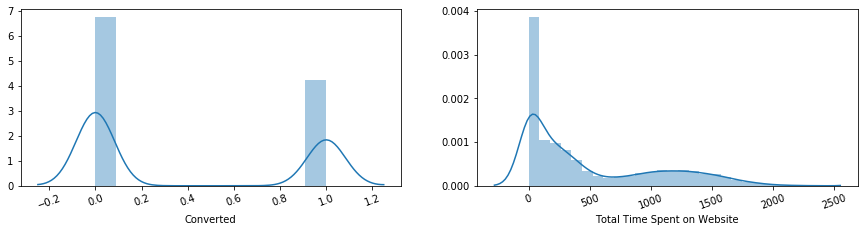

In [16]:
# check the distribution of below Columns - Univariate Analysis
plt.figure(figsize=(15,15))
features = ['Converted', 'Total Time Spent on Website']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(lead_df[i[1]])
    plt.xticks(rotation = 20)

In [17]:
# Check the columns having datatype= float
lead_df.select_dtypes(include='float').columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

## Univariate Analysis and Outlier Treatment

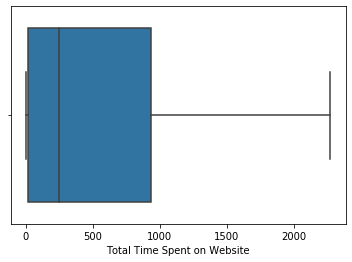

In [18]:
# Check below variable int variable for outliers
sns.boxplot(lead_df['Total Time Spent on Website'])

# No outliers are there

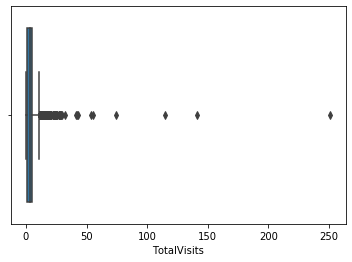

In [19]:
# Check below variable float variable for outliers
sns.boxplot(lead_df['TotalVisits'])

In [20]:
## Capping the ouliers with 0.03 and 0.97 quantiles.
Q1_TotalVisits = lead_df['TotalVisits'].quantile(0.03)
Q4_TotalVisits = lead_df['TotalVisits'].quantile(0.97)
lead_df['TotalVisits'][lead_df['TotalVisits'] <= Q1_TotalVisits]=Q1_TotalVisits
lead_df['TotalVisits'][lead_df['TotalVisits'] >= Q4_TotalVisits]=Q4_TotalVisits

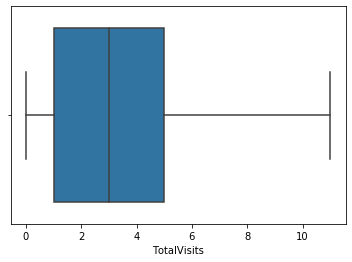

In [21]:
# No outliers post capping
sns.boxplot(lead_df['TotalVisits'])

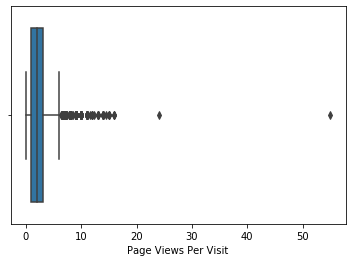

In [22]:
# Check below float variable for outliers
sns.boxplot(lead_df['Page Views Per Visit'])

In [23]:
## Capping the ouliers with 0.04 and 0.96 quantiles.
Q1_Visit = lead_df['Page Views Per Visit'].quantile(0.04)
Q4_Visit = lead_df['Page Views Per Visit'].quantile(0.96)
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= Q1_Visit]=Q1_Visit
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= Q4_Visit]=Q4_Visit

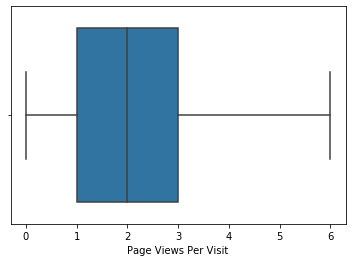

In [24]:
# No outliers present post capping
sns.boxplot(lead_df['Page Views Per Visit'])

In [25]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


## Check Categorical Data

In [26]:
#Check all the object type columns
lead_df.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Map Binaray Variable to 0 or 1

In [27]:
# List of object type variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']


# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [28]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


## EDA - Data Clean-up/Data Imputation

#### Need to check missing values for all the object type variables and impute or delete the values accordingly

In [29]:
# Look for the percentage of null values
lead_df['Lead Origin'].isnull().sum()/len(lead_df)

0.0

In [30]:
# check the percentage of value_counts
lead_df['Lead Origin'].value_counts()/len(lead_df)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

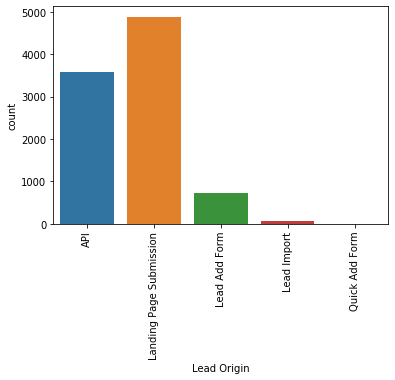

In [31]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Lead Origin'])
xticks(rotation = 90)

In [32]:
# Combine multiple attributes to a single attribute having less percentage of skewness 
s = lead_df['Lead Origin'].value_counts(normalize=True)
lead_df['Lead Origin'] = np.where(lead_df['Lead Origin'].isin(s.index[s > 0.10]), lead_df['Lead Origin'], 'L_O_Otr')

In [33]:
# Again check the value_counts
lead_df['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.528788
API                        0.387446
L_O_Otr                    0.083766
Name: Lead Origin, dtype: float64

In [34]:
# Look for the percentage of null values
lead_df['Lead Source'].isnull().sum()/len(lead_df)

0.003896103896103896

In [35]:
# Impute the null values with the most frequently occurring value - Mode()
lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0], inplace=True)

In [36]:
# Look for the percentage of null values
lead_df['Lead Source'].isnull().sum()/len(lead_df)

0.0

In [37]:
## check the percentage of value_counts
lead_df['Lead Source'].value_counts(normalize = True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Live Chat            0.000216
Social Media         0.000216
youtubechannel       0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
testone              0.000108
welearnblog_Home     0.000108
Pay per Click Ads    0.000108
Name: Lead Source, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

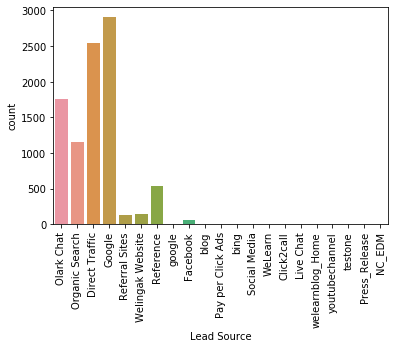

In [38]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Lead Source'])
xticks(rotation = 90)

In [39]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Lead Source'].value_counts(normalize=True)
lead_df['Lead Source'] = np.where(lead_df['Lead Source'].isin(s.index[s > 0.10]), lead_df['Lead Source'], 'L_S_Ots')
lead_df['Lead Source'].value_counts(normalize = True)

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
L_S_Ots           0.095671
Name: Lead Source, dtype: float64

In [40]:
# check the percentage of value_counts
lead_df['Do Not Email'].value_counts()/len(lead_df)*100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

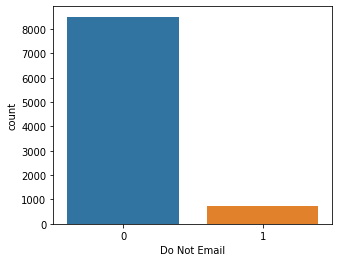

In [41]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(5,4))
sns.countplot(lead_df['Do Not Email'])

In [42]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Do Not Email'], axis=1, inplace=True)

In [43]:
# check the percentage of value_counts
lead_df['Do Not Call'].value_counts()/len(lead_df)*100

0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64

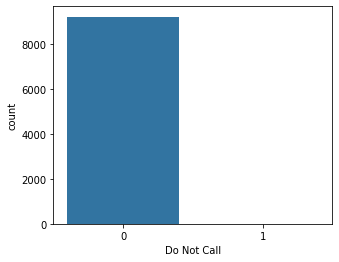

In [44]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(5,4))
sns.countplot(lead_df['Do Not Call'])

In [45]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Do Not Call'], axis=1, inplace=True)

In [46]:
# Look for the percentage of null values
lead_df['Last Activity'].isnull().sum()/len(lead_df)

0.011147186147186147

In [47]:
# Impute the null values with the most frequently occurring value - Mode()
lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0], inplace=True)

In [48]:
# Look for the percentage of null values
lead_df['Last Activity'].isnull().sum()/len(lead_df)

0.0

In [49]:
## check the percentage of value_counts
lead_df['Last Activity'].value_counts(normalize = True)

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

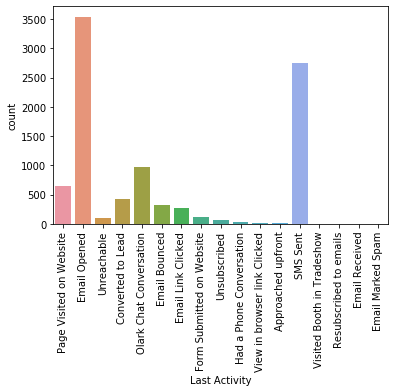

In [50]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Last Activity'])
xticks(rotation = 90)

In [51]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Last Activity'].value_counts(normalize=True)
lead_df['Last Activity'] = np.where(lead_df['Last Activity'].isin(s.index[s > 0.10]), lead_df['Last Activity'], 'L_A_Otr')
lead_df['Last Activity'].value_counts(normalize = True)

Email Opened               0.383117
SMS Sent                   0.297078
L_A_Otr                    0.214502
Olark Chat Conversation    0.105303
Name: Last Activity, dtype: float64

In [52]:
# Look for the percentage of null values
lead_df['Country'].isnull().sum()/len(lead_df)

0.2663419913419913

In [53]:
# Impute the null values with "Ctry_Otr" and then replace the "unknown" values with "Ctry_Otr"
lead_df['Country'].fillna('Ctry_Otr', inplace = True)
lead_df['Country'].replace('unknown','Ctry_Otr', inplace = True)

In [54]:
# Look for the percentage of null values
lead_df['Country'].isnull().sum()/len(lead_df)

0.0

In [55]:
# check the percentage of value_counts
lead_df['Country'].value_counts(normalize = True)

India                   0.702597
Ctry_Otr                0.266883
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
Kuwait                  0.000433
South Africa            0.000433
Germany                 0.000433
Canada                  0.000433
Nigeria                 0.000433
Sweden                  0.000325
Italy                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Uganda                  0.000216
China                   0.000216
Philippines             0.000216
Asia/Pacific Region     0.000216
Bangladesh              0.000216
Netherlands             0.000216
Vietnam                 0.000108
Denmark                 0.000108
Malaysia  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

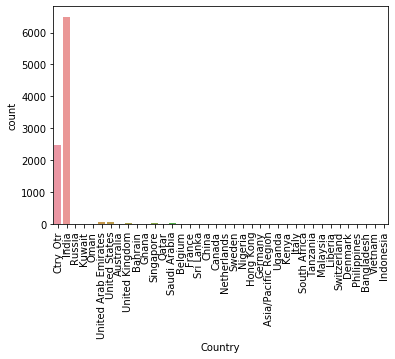

In [56]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Country'])
xticks(rotation = 90)

In [57]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Country'].value_counts(normalize=True)
lead_df['Country'] = np.where(lead_df['Country'].isin(s.index[s > 0.30]), lead_df['Country'], 'Non_Ind')
lead_df['Country'].value_counts(normalize = True)

India      0.702597
Non_Ind    0.297403
Name: Country, dtype: float64

In [58]:
# Look for the percentage of null values
lead_df['Specialization'].isnull().sum()/len(lead_df)

0.3658008658008658

In [59]:
# Replace Nan Values with "Other"
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan,'Other')

In [60]:
# Look for the percentage of null values
lead_df['Specialization'].isnull().sum()/len(lead_df)

0.0

In [61]:
## check the percentage of value_counts
lead_df['Specialization'].value_counts(normalize=True)

Other                                0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

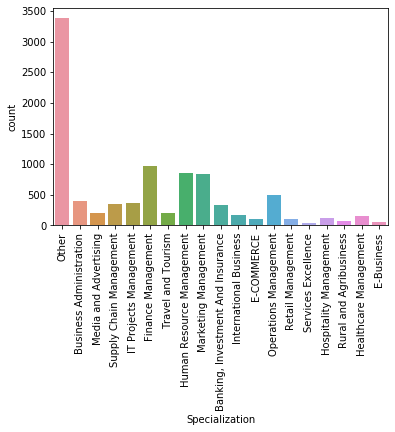

In [62]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Specialization'])
xticks(rotation = 90)

In [63]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Specialization'].value_counts(normalize=True)
lead_df['Specialization'] = np.where(lead_df['Specialization'].isin(s.index[s > 0.10]), lead_df['Specialization'], 'Non_Fin')
lead_df['Specialization'].value_counts(normalize = True)

Non_Fin               0.528571
Other                 0.365801
Finance Management    0.105628
Name: Specialization, dtype: float64

In [64]:
# Look for the percentage of null values
lead_df['What is your current occupation'].isnull().sum()/len(lead_df)

0.2911255411255411

In [65]:
# Impute Null values with "Occ_nt_provided" value
lead_df['What is your current occupation'].fillna('Occ_nt_provided', inplace = True)

In [66]:
# Look for null values
lead_df['What is your current occupation'].isnull().sum()/len(lead_df)

0.0

In [67]:
# Plotted bar graph - Visual representation of value counts
lead_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
Occ_nt_provided         0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

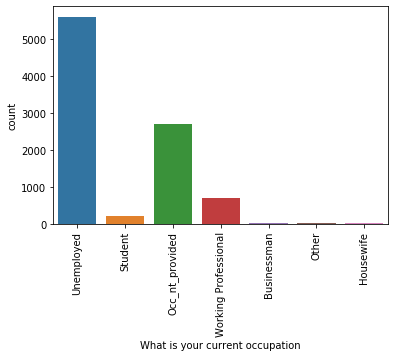

In [68]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['What is your current occupation'])
xticks(rotation = 90)

In [69]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['What is your current occupation'].value_counts(normalize=True)
lead_df['What is your current occupation'] = np.where(lead_df['What is your current occupation'].isin(s.index[s > 0.10]), lead_df['What is your current occupation'], 'Ocp_Otr')
lead_df['What is your current occupation'].value_counts(normalize = True)

Unemployed         0.606061
Occ_nt_provided    0.291126
Ocp_Otr            0.102814
Name: What is your current occupation, dtype: float64

In [70]:
# Look for null values
lead_df['What matters most to you in choosing a course'].isnull().sum()/len(lead_df)

0.29318181818181815

In [71]:
# check the value_counts
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [72]:
# Impute Null values with "Obj_nt_provided"
lead_df['What matters most to you in choosing a course'].fillna('Obj_nt_provided', inplace = True)

In [73]:
# Look for null values
lead_df['What matters most to you in choosing a course'].isnull().sum()/len(lead_df)

0.0

In [74]:
# Plotted bar graph - Visual representation of value counts
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.706494
Obj_nt_provided              0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

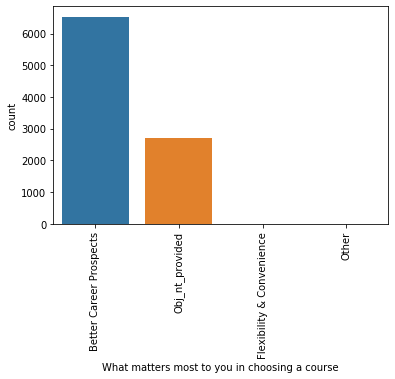

In [75]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [76]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)
lead_df['What matters most to you in choosing a course'] = np.where(lead_df['What matters most to you in choosing a course'].isin(s.index[s > 0.30]), lead_df['What matters most to you in choosing a course'], 'Obj_Otr')
lead_df['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects    0.706494
Obj_Otr                    0.293506
Name: What matters most to you in choosing a course, dtype: float64

In [77]:
# check the percentage of value_counts
lead_df['Search'].value_counts()/len(lead_df)*100

0    99.848485
1     0.151515
Name: Search, dtype: float64

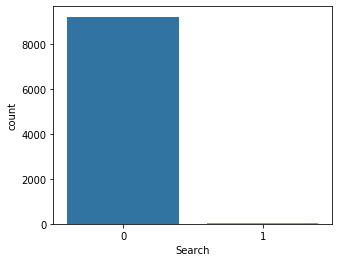

In [78]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(5,4))
sns.countplot(lead_df['Search'])

In [79]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Search'], axis=1, inplace=True)

In [80]:
# check the percentage of value_counts
lead_df['Magazine'].value_counts()/len(lead_df)*100

0    100.0
Name: Magazine, dtype: float64

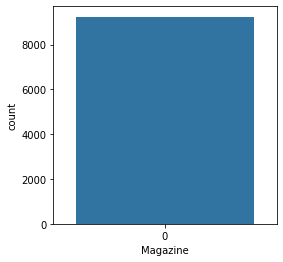

In [81]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['Magazine'])

In [82]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Magazine'], axis=1, inplace=True)

In [83]:
# check the percentage of value_counts
lead_df['Newspaper Article'].value_counts()/len(lead_df)*100

0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64

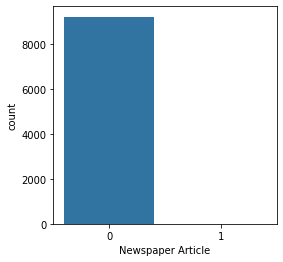

In [84]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['Newspaper Article'])

In [85]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Newspaper Article'], axis=1, inplace=True)

In [86]:
# check the percentage of value_counts
lead_df['X Education Forums'].value_counts()/len(lead_df)*100

0    99.989177
1     0.010823
Name: X Education Forums, dtype: float64

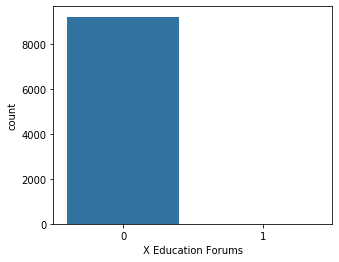

In [87]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(5,4))
sns.countplot(lead_df['X Education Forums'])

In [88]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['X Education Forums'], axis=1, inplace=True)

In [89]:
# check the percentage of value_counts
lead_df['Newspaper'].value_counts()/len(lead_df)*100

0    99.989177
1     0.010823
Name: Newspaper, dtype: float64

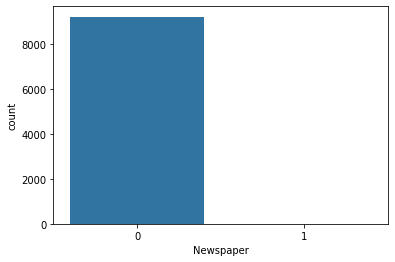

In [90]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Newspaper'])

In [91]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Newspaper'], axis=1, inplace=True)

In [92]:
# check the percentage of value_counts
lead_df['Digital Advertisement'].value_counts()/len(lead_df)*100

0    99.95671
1     0.04329
Name: Digital Advertisement, dtype: float64

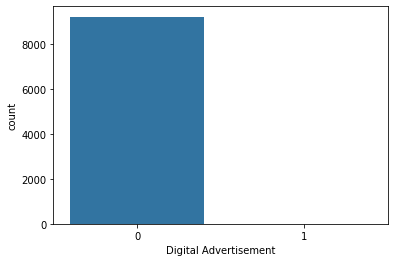

In [93]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Digital Advertisement'])

In [94]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Digital Advertisement'], axis=1, inplace=True)

In [95]:
# check the percentage of value_counts
lead_df['Through Recommendations'].value_counts()/len(lead_df)*100

0    99.924242
1     0.075758
Name: Through Recommendations, dtype: float64

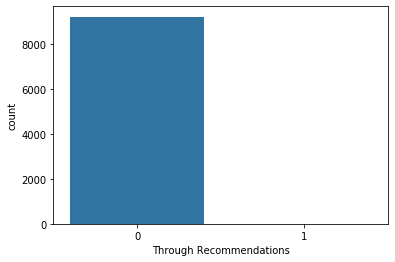

In [96]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Through Recommendations'])

In [97]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Through Recommendations'], axis=1, inplace=True)

In [98]:
# check the percentage of value_counts
lead_df['Receive More Updates About Our Courses'].value_counts()/len(lead_df)*100

0    100.0
Name: Receive More Updates About Our Courses, dtype: float64

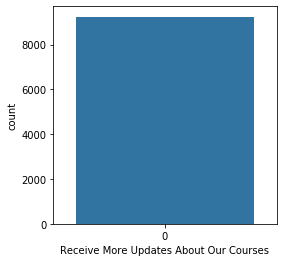

In [99]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['Receive More Updates About Our Courses'])

In [100]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)

In [101]:
## check the percentage of value_counts
lead_df['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

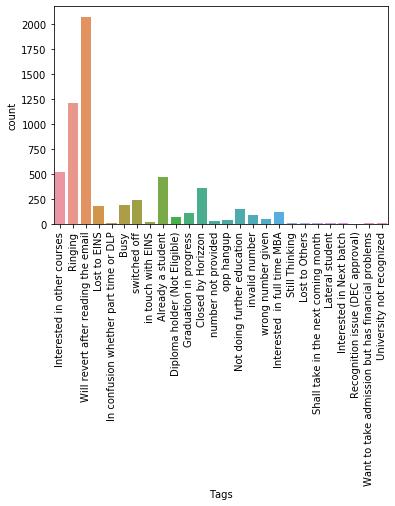

In [102]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Tags'])
xticks(rotation = 90)

In [103]:
# Look for percentage of null values
lead_df['Tags'].isnull().sum()/len(lead_df)*100

36.28787878787879

In [104]:
# Impute the null values with "Tag_nt_provided"
lead_df['Tags'].fillna('Tag_nt_provided', inplace = True)

In [105]:
# Look for null values
lead_df['Tags'].isnull().sum()/len(lead_df)*100

0.0

In [106]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Tags'].value_counts(normalize=True)
lead_df['Tags'] = np.where(lead_df['Tags'].isin(s.index[s > 0.10]), lead_df['Tags'], 'Tag_Otr')
lead_df['Tags'].value_counts(normalize=True)

Tag_nt_provided                        0.362879
Tag_Otr                                0.282684
Will revert after reading the email    0.224242
Ringing                                0.130195
Name: Tags, dtype: float64

In [107]:
# check the percentage of value_counts
lead_df['Update me on Supply Chain Content'].value_counts()/len(lead_df)*100

0    100.0
Name: Update me on Supply Chain Content, dtype: float64

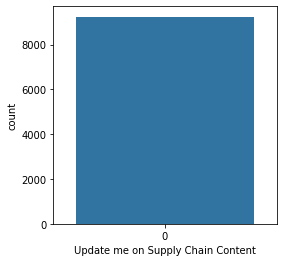

In [108]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['Update me on Supply Chain Content'])

In [109]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)

In [110]:
# check the percentage of value_counts
lead_df['Get updates on DM Content'].value_counts()/len(lead_df)*100

0    100.0
Name: Get updates on DM Content, dtype: float64

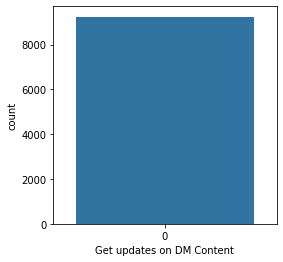

In [111]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['Get updates on DM Content'])

In [112]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['Get updates on DM Content'], axis=1, inplace=True)

In [113]:
# check the percentage of value_counts
lead_df['City'].value_counts()/len(lead_df)*100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

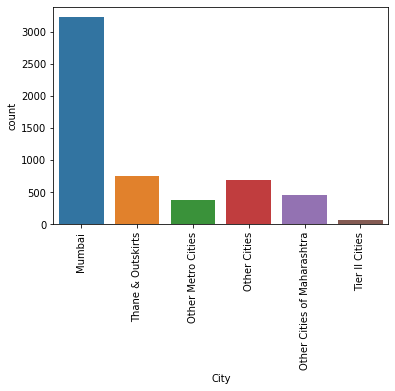

In [114]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['City'])
xticks(rotation = 90)

In [115]:
# Look for percentage of Null values
lead_df['City'].isnull().sum()/len(lead_df)*100

39.70779220779221

In [116]:
# We are assigning the some of values in city column with the attribute "Int_City(International_city)" whose country is not India.
lead_df['City'].mask(lead_df['Country'] == 'Non_Ind', 'Int_City', inplace=True)

In [117]:
# check the percentage of value_counts
lead_df['City'].value_counts(normalize=True)

Mumbai                         0.379651
Int_City                       0.357533
Thane & Outskirts              0.084699
Other Cities                   0.073380
Other Cities of Maharashtra    0.050872
Other Metro Cities             0.044887
Tier II Cities                 0.008977
Name: City, dtype: float64

In [118]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['City'].value_counts(normalize=True)
lead_df['City'] = np.where(lead_df['City'].isin(s.index[s > 0.10]), lead_df['City'], 'City_Otrs')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

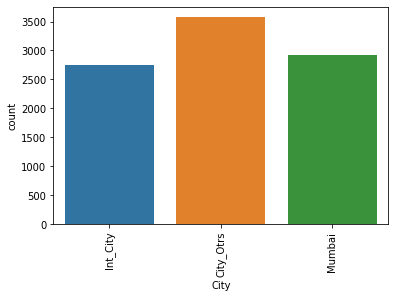

In [119]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['City'])
xticks(rotation = 90)

In [120]:
## check the percentage of value_counts
lead_df['City'].value_counts(normalize=True)

City_Otrs    0.386797
Mumbai       0.315801
Int_City     0.297403
Name: City, dtype: float64

In [121]:
# check the percentage of value_counts
lead_df['I agree to pay the amount through cheque'].value_counts()/len(lead_df)*100

0    100.0
Name: I agree to pay the amount through cheque, dtype: float64

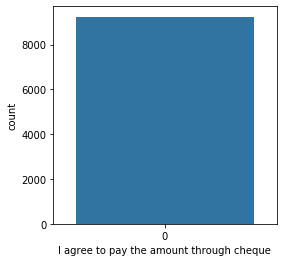

In [122]:
# Plotted bar graph - Visual representation of value counts
plt.figure(figsize=(4,4))
sns.countplot(lead_df['I agree to pay the amount through cheque'])

In [123]:
# As the values are heavily skewed, we are dropping the column as it does not help in analysis
lead_df.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)

In [124]:
# check the percentage of value_counts
lead_df['A free copy of Mastering The Interview'].value_counts()/len(lead_df)*100

0    68.744589
1    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

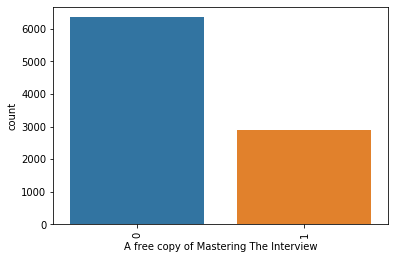

In [125]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['A free copy of Mastering The Interview'])
xticks(rotation = 90)

In [126]:
# Look for null values
lead_df['A free copy of Mastering The Interview'].isnull().sum()/len(lead_df)*100

0.0

In [127]:
# check the percentage of value_counts
lead_df['Last Notable Activity'].value_counts()/len(lead_df)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Email Received                   0.010823
Resubscribed to emails           0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

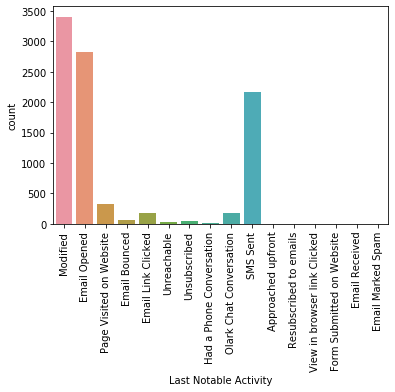

In [128]:
# Plotted bar graph - Visual representation of value counts
sns.countplot(lead_df['Last Notable Activity'])
xticks(rotation = 90)

In [129]:
# Look for null values
lead_df['Last Notable Activity'].isnull().sum()/len(lead_df)*100

0.0

In [130]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = lead_df['Last Notable Activity'].value_counts(normalize=True)
lead_df['Last Notable Activity'] = np.where(lead_df['Last Notable Activity'].isin(s.index[s > 0.10]), lead_df['Last Notable Activity'], 'Lst_act_Otr')
lead_df['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Lst_act_Otr     0.090260
Name: Last Notable Activity, dtype: float64

In [131]:
# Again check the shape of the dataset
lead_df.shape

(9240, 17)

In [132]:
# Check the percentage of missing values
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

In [133]:
# Drop null values
lead_df.dropna(inplace=True)
lead_df.shape

(9103, 17)

In [134]:
# Check the retained object type variables
lead_df.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

# Step-2 Create Dummy Variables

In [135]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
D_Lead_Origin = pd.get_dummies(lead_df['Lead Origin'], prefix='Ld_Or')
# Dropping MultipleLines_No phone service column
D_Lead_Origin = D_Lead_Origin.drop(['Ld_Or_L_O_Otr'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Lead_Origin], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_Lead_Source = pd.get_dummies(lead_df['Lead Source'], prefix='Ld_Sr')
# Dropping MultipleLines_No phone service column
D_Lead_Source = D_Lead_Source.drop(['Ld_Sr_L_S_Ots'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Lead_Source], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_Last_Activity = pd.get_dummies(lead_df['Last Activity'], prefix='Lst_Act')
# Dropping MultipleLines_No phone service column
D_Last_Activity = D_Last_Activity.drop(['Lst_Act_Olark Chat Conversation'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Last_Activity], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_Country = pd.get_dummies(lead_df['Country'], prefix='Ctry')
# Dropping MultipleLines_No phone service column
D_Country = D_Country.drop(['Ctry_Non_Ind'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Country], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_Specialization = pd.get_dummies(lead_df['Specialization'], prefix='Spec')
# Dropping MultipleLines_No phone service column
D_Specialization = D_Specialization.drop(['Spec_Other'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Specialization], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_current_occ = pd.get_dummies(lead_df['What is your current occupation'], prefix='Curnt_Occ')
# Dropping MultipleLines_No phone service column
D_current_occ = D_current_occ.drop(['Curnt_Occ_Occ_nt_provided'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_current_occ], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_Tags = pd.get_dummies(lead_df['Tags'], prefix='Tags')
# Dropping MultipleLines_No phone service column
D_Tags = D_Tags.drop(['Tags_Tag_Otr'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Tags], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_City = pd.get_dummies(lead_df['City'], prefix='City')
# Dropping MultipleLines_No phone service column
D_City = D_City.drop(['City_Int_City'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_City], axis=1)

# Creating dummy variables for the variable 'MultipleLines'
D_N_Last_Activity = pd.get_dummies(lead_df['Last Notable Activity'], prefix='Lst_Ntbl_Act')
# Dropping MultipleLines_No phone service column
D_N_Last_Activity = D_N_Last_Activity.drop(['Lst_Ntbl_Act_Lst_act_Otr'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_N_Last_Activity], axis=1)


# Creating dummy variables for the variable 'MultipleLines'
D_Obj = pd.get_dummies(lead_df['What matters most to you in choosing a course'], prefix='Obj')
# Dropping MultipleLines_No phone service column
D_Obj = D_Obj.drop(['Obj_Obj_Otr'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,D_Obj], axis=1)


In [136]:
lead_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Ld_Or_API,Ld_Or_Landing Page Submission,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_Email Opened,Lst_Act_L_A_Otr,Lst_Act_SMS Sent,Ctry_India,Spec_Finance Management,Spec_Non_Fin,Curnt_Occ_Ocp_Otr,Curnt_Occ_Unemployed,Tags_Ringing,Tags_Tag_nt_provided,Tags_Will revert after reading the email,City_City_Otrs,City_Mumbai,Lst_Ntbl_Act_Email Opened,Lst_Ntbl_Act_Modified,Lst_Ntbl_Act_SMS Sent,Obj_Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,L_A_Otr,Non_Ind,Other,Unemployed,Better Career Prospects,Tag_Otr,Int_City,0,Modified,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Better Career Prospects,Ringing,City_Otrs,0,Email Opened,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Non_Fin,Ocp_Otr,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,L_A_Otr,India,Non_Fin,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,L_A_Otr,India,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1


#### Dropping the repeated variables

In [137]:
# # We have created dummies for the below variables, so we can drop them
lead_df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','City','Last Notable Activity',
             'What matters most to you in choosing a course'], axis = 1, inplace = True)

#### After all imputation and dropping columns and rows, again checking the structure of the dataset

In [138]:
lead_df.shape

(9103, 30)

In [139]:
lead_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Ld_Or_API,Ld_Or_Landing Page Submission,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_Email Opened,Lst_Act_L_A_Otr,Lst_Act_SMS Sent,Ctry_India,Spec_Finance Management,Spec_Non_Fin,Curnt_Occ_Ocp_Otr,Curnt_Occ_Unemployed,Tags_Ringing,Tags_Tag_nt_provided,Tags_Will revert after reading the email,City_City_Otrs,City_Mumbai,Lst_Ntbl_Act_Email Opened,Lst_Ntbl_Act_Modified,Lst_Ntbl_Act_SMS Sent,Obj_Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1


In [140]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Ld_Or_API',
       'Ld_Or_Landing Page Submission', 'Ld_Sr_Direct Traffic', 'Ld_Sr_Google',
       'Ld_Sr_Olark Chat', 'Ld_Sr_Organic Search', 'Lst_Act_Email Opened',
       'Lst_Act_L_A_Otr', 'Lst_Act_SMS Sent', 'Ctry_India',
       'Spec_Finance Management', 'Spec_Non_Fin', 'Curnt_Occ_Ocp_Otr',
       'Curnt_Occ_Unemployed', 'Tags_Ringing', 'Tags_Tag_nt_provided',
       'Tags_Will revert after reading the email', 'City_City_Otrs',
       'City_Mumbai', 'Lst_Ntbl_Act_Email Opened', 'Lst_Ntbl_Act_Modified',
       'Lst_Ntbl_Act_SMS Sent', 'Obj_Better Career Prospects'],
      dtype='object')

In [141]:
# Drop below columns as it does not help in analysis
lead_df.drop(['Lead Number'], axis=1, inplace=True)
lead_df.drop(['Prospect ID'], axis=1, inplace=True)

# Step 3 - Test Train Split

In [142]:
## Import libraries used for train-test split
from sklearn.model_selection import train_test_split

In [143]:
# Put all the feature variables in X

X = lead_df.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Ld_Or_API,Ld_Or_Landing Page Submission,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_Email Opened,Lst_Act_L_A_Otr,Lst_Act_SMS Sent,Ctry_India,Spec_Finance Management,Spec_Non_Fin,Curnt_Occ_Ocp_Otr,Curnt_Occ_Unemployed,Tags_Ringing,Tags_Tag_nt_provided,Tags_Will revert after reading the email,City_City_Otrs,City_Mumbai,Lst_Ntbl_Act_Email Opened,Lst_Ntbl_Act_Modified,Lst_Ntbl_Act_SMS Sent,Obj_Better Career Prospects
0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,2.0,1532,2.0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1
3,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1
4,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1


In [144]:
# Put the target variable in y

y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [145]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step-4  Scaling Data Using Standard Scaler

In [146]:
# Scale the three numeric features present in the dataset

scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Ld_Or_API,Ld_Or_Landing Page Submission,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_Email Opened,Lst_Act_L_A_Otr,Lst_Act_SMS Sent,Ctry_India,Spec_Finance Management,Spec_Non_Fin,Curnt_Occ_Ocp_Otr,Curnt_Occ_Unemployed,Tags_Ringing,Tags_Tag_nt_provided,Tags_Will revert after reading the email,City_City_Otrs,City_Mumbai,Lst_Ntbl_Act_Email Opened,Lst_Ntbl_Act_Modified,Lst_Ntbl_Act_SMS Sent,Obj_Better Career Prospects
7962,-0.079783,1.476324,-0.423364,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,1
5520,1.299804,-0.771066,2.083179,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1962,0.610010,-0.571257,0.133646,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1
1566,2.679391,1.393834,0.690655,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1
9170,-1.114473,-0.881052,-1.258878,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [147]:
### Checking the converted Rate
converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

38.02043282434362

# Step-5 Eliminate Highly Correlated Data before Model Building (Multi-Variate Analysis)

In [148]:
# Let's see the correlation matrix 
lead_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Ld_Or_API,Ld_Or_Landing Page Submission,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_Email Opened,Lst_Act_L_A_Otr,Lst_Act_SMS Sent,Ctry_India,Spec_Finance Management,Spec_Non_Fin,Curnt_Occ_Ocp_Otr,Curnt_Occ_Unemployed,Tags_Ringing,Tags_Tag_nt_provided,Tags_Will revert after reading the email,City_City_Otrs,City_Mumbai,Lst_Ntbl_Act_Email Opened,Lst_Ntbl_Act_Modified,Lst_Ntbl_Act_SMS Sent,Obj_Better Career Prospects
Converted,1.000000,0.047525,0.354939,-0.003800,-0.033079,-0.113685,-0.040698,-0.075079,0.034760,-0.125395,-0.001874,-0.025097,-0.190456,0.338020,-0.033667,0.043609,0.125595,0.280294,0.128250,-0.280750,-0.207261,0.653046,-0.033760,0.002698,-0.015081,-0.264267,0.362200,0.325403
TotalVisits,0.047525,1.000000,0.356565,0.753938,0.294603,-0.306633,0.445684,0.126067,0.200977,-0.489758,0.301606,0.062004,0.068619,0.017268,0.576217,0.090112,0.326090,-0.010837,0.076617,0.086045,-0.121277,0.052877,0.235699,0.311797,0.079923,-0.152138,0.015710,0.076232
Total Time Spent on Website,0.354939,0.356565,1.000000,0.366835,0.179005,-0.195333,0.294515,0.142287,0.210256,-0.376633,0.101911,0.009727,-0.010293,0.127009,0.443628,0.074670,0.241020,0.084316,0.083707,-0.052703,-0.151480,0.263795,0.218737,0.201050,0.017559,-0.125220,0.133511,0.145649
Page Views Per Visit,-0.003800,0.753938,0.366835,1.000000,0.299132,-0.398204,0.555938,0.162269,0.254271,-0.575653,0.312233,0.069807,0.027452,0.078251,0.651030,0.107388,0.379174,-0.022983,0.095524,0.132935,-0.149374,0.061967,0.269435,0.349000,0.079441,-0.117057,0.067037,0.088741
A free copy of Mastering The Interview,-0.033079,0.294603,0.179005,0.299132,1.000000,-0.487679,0.565601,0.596145,-0.323856,-0.299388,0.144640,0.036802,0.070365,0.027458,0.328452,0.114245,0.422595,-0.004110,0.067313,0.074794,-0.133475,-0.006017,0.010692,0.307124,0.052088,-0.072534,0.023212,0.072763
Ld_Or_API,-0.113685,-0.306633,-0.195333,-0.398204,-0.487679,1.000000,-0.866221,-0.445903,0.009326,0.605726,0.001630,-0.042190,-0.075468,-0.133002,-0.351445,-0.211520,-0.597292,-0.083524,-0.124927,-0.102348,0.241809,-0.130033,0.105569,-0.451060,-0.055495,0.122684,-0.110665,-0.185151
Ld_Or_Landing Page Submission,-0.040698,0.445684,0.294515,0.555938,0.565601,-0.866221,1.000000,0.524414,0.073331,-0.525681,0.052041,0.041447,0.117531,0.060716,0.553556,0.202548,0.602950,-0.002731,0.090929,0.133895,-0.184737,0.031580,0.005716,0.530485,0.060284,-0.082726,0.049199,0.091293
Ld_Sr_Direct Traffic,-0.075079,0.126067,0.142287,0.162269,0.596145,-0.445903,0.524414,1.000000,-0.425392,-0.304066,-0.237229,0.015578,0.099890,0.012341,0.284420,0.091791,0.316826,0.007764,0.044047,0.071815,-0.107287,-0.030849,0.046413,0.227073,0.027119,-0.041592,0.013920,0.045213
Ld_Sr_Google,0.034760,0.200977,0.210256,0.254271,-0.323856,0.009326,0.073331,-0.425392,1.000000,-0.333669,-0.260324,0.029767,0.012925,0.018329,0.387406,0.052048,0.029605,-0.029880,0.034730,0.020719,-0.021891,0.042664,0.198293,0.167956,0.024626,-0.009176,0.003192,0.020923
Ld_Sr_Olark Chat,-0.125395,-0.489758,-0.376633,-0.575653,-0.299388,0.605726,-0.525681,-0.304066,-0.333669,1.000000,-0.186078,-0.042455,-0.128651,-0.125911,-0.714022,-0.135256,-0.405020,-0.066411,-0.155278,-0.100836,0.247017,-0.130987,-0.366974,-0.307984,-0.049614,0.101782,-0.100180,-0.208066


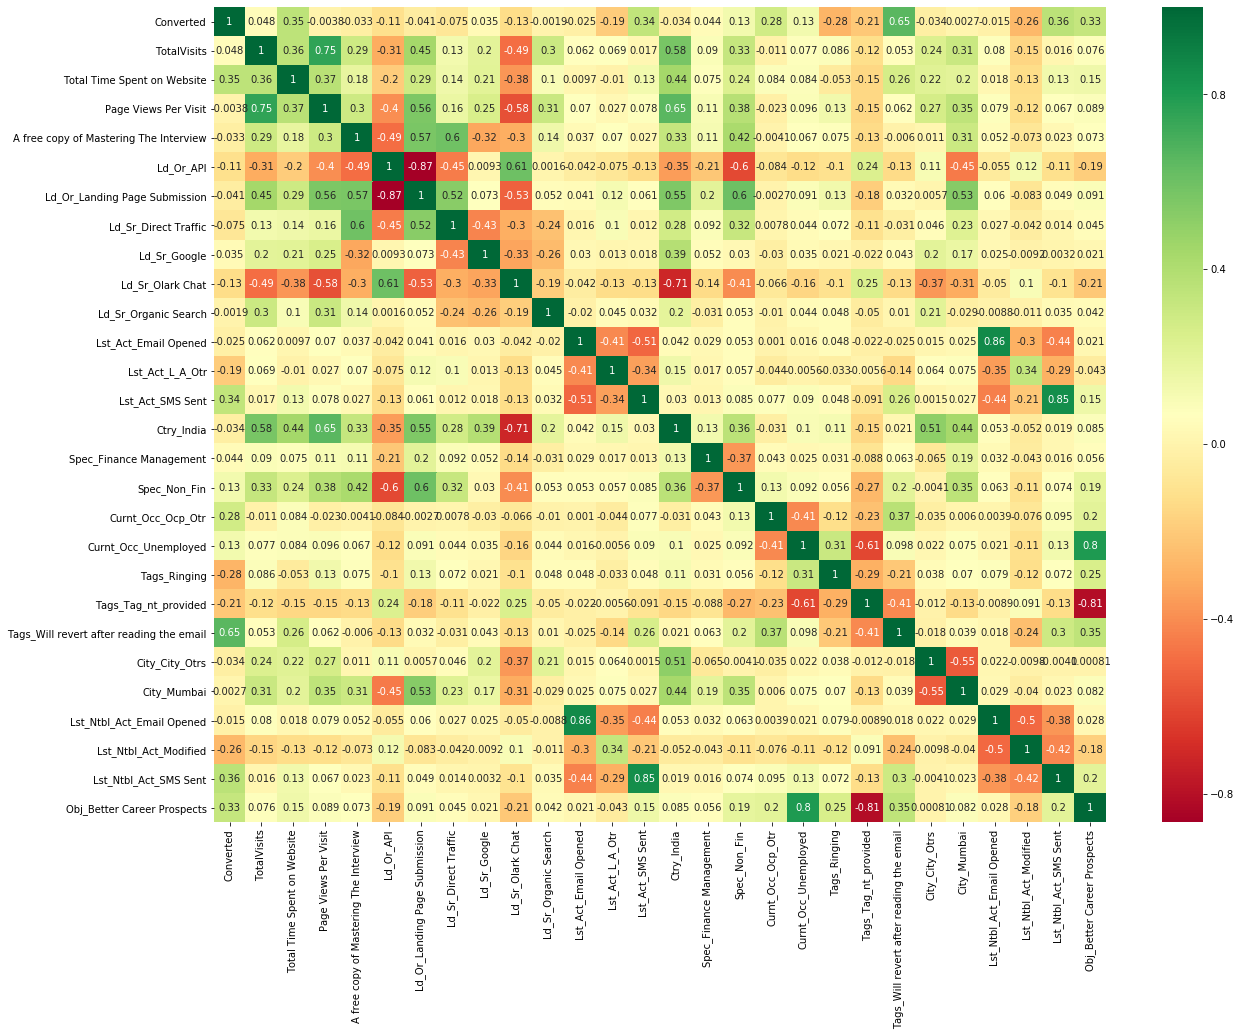

In [149]:
# Let's see the correlation matrix - Multivariate Analysis
plt.figure(figsize = (20,15))        # Size of the figure
ax=sns.heatmap(lead_df.corr(),annot = True,cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [150]:
# Dropping highly correlated columns from both Train and test data set
X_test = X_test.drop(['Ld_Or_API','Lst_Act_Email Opened','Lst_Act_SMS Sent'], 1)
X_train = X_train.drop(['Ld_Or_API','Lst_Act_Email Opened','Lst_Act_SMS Sent'], 1)

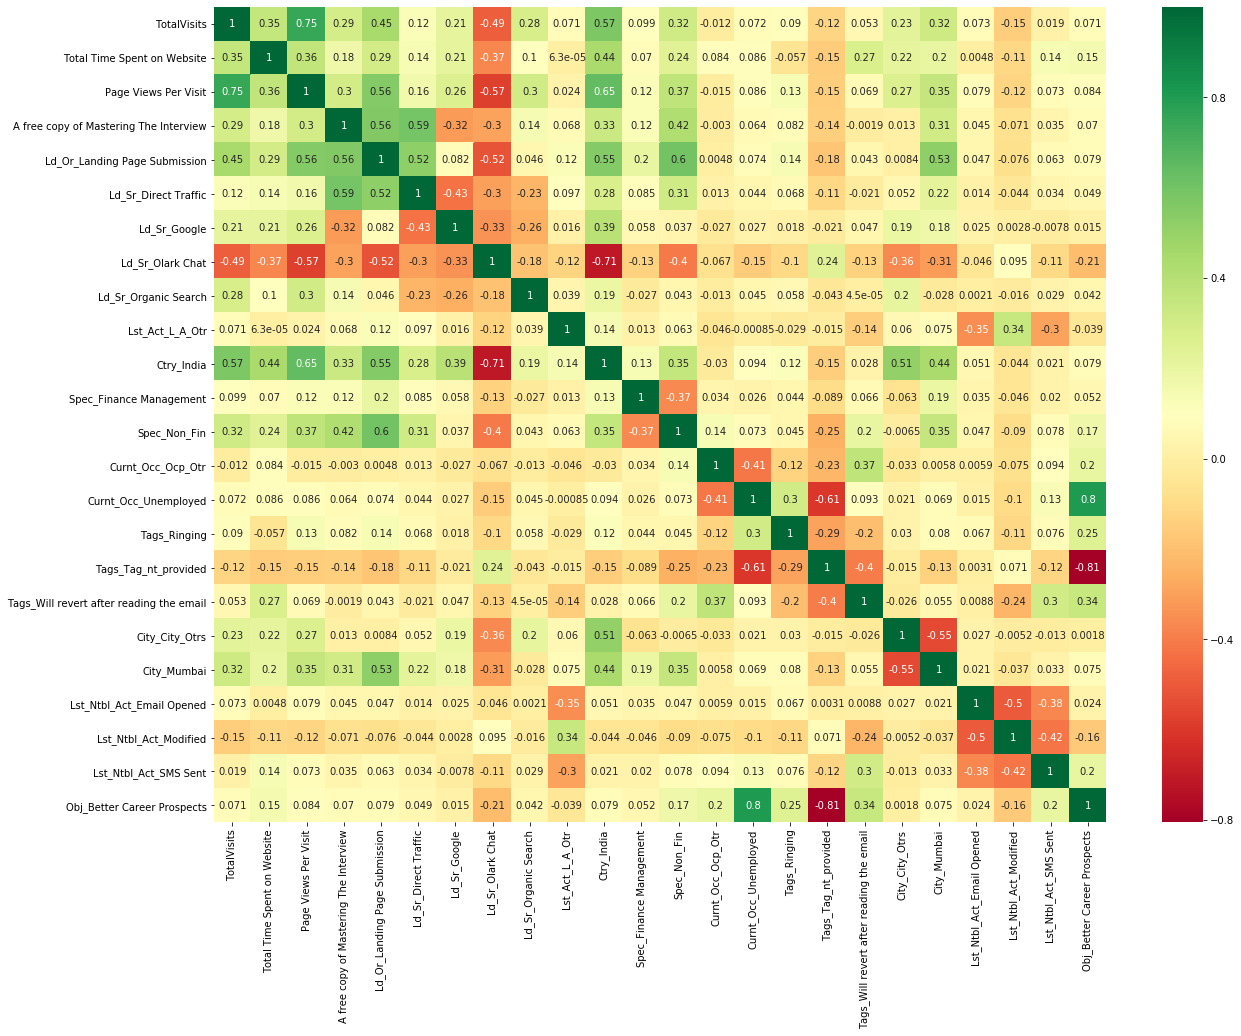

In [151]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,15))        # Size of the figure
ax=sns.heatmap(X_train.corr(),annot = True,cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Step 6: Feature Selection Using RFE

In [152]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [153]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [154]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True])

In [155]:
# Checking the ranks assinged to each column by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Ld_Or_Landing Page Submission', False, 4),
 ('Ld_Sr_Direct Traffic', True, 1),
 ('Ld_Sr_Google', True, 1),
 ('Ld_Sr_Olark Chat', True, 1),
 ('Ld_Sr_Organic Search', True, 1),
 ('Lst_Act_L_A_Otr', True, 1),
 ('Ctry_India', True, 1),
 ('Spec_Finance Management', False, 2),
 ('Spec_Non_Fin', False, 3),
 ('Curnt_Occ_Ocp_Otr', True, 1),
 ('Curnt_Occ_Unemployed', False, 5),
 ('Tags_Ringing', True, 1),
 ('Tags_Tag_nt_provided', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('City_City_Otrs', False, 6),
 ('City_Mumbai', False, 8),
 ('Lst_Ntbl_Act_Email Opened', False, 10),
 ('Lst_Ntbl_Act_Modified', False, 7),
 ('Lst_Ntbl_Act_SMS Sent', True, 1),
 ('Obj_Better Career Prospects', True, 1)]

In [156]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [157]:
# Checking Cols which are not taken by RFE
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Ld_Or_Landing Page Submission', 'Spec_Finance Management',
       'Spec_Non_Fin', 'Curnt_Occ_Unemployed', 'City_City_Otrs', 'City_Mumbai',
       'Lst_Ntbl_Act_Email Opened', 'Lst_Ntbl_Act_Modified'],
      dtype='object')

# Step 7 Model Building

## Model 1

##### Building model using statsmodel, for the detailed statistics

In [158]:
# Import statsmodels
import statsmodels.api as sm

In [159]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.3
Date:                Tue, 02 Jun 2020   Deviance:                       3566.6
Time:                        00:11:10   Pearson chi2:                 8.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7762      0.218     -3.563      0.000      -1.203      -0.349
TotalVisits                                  0.5057      0.064      7.876      0.000       0.380       0.632
Total Time Spent on Website                  1.0342      0.050     20.508      0.000       0.935       1.133
Page Views Per Visit                        -0.6009      0.077     -7.797      0.000      -0.752      -0.450
Ld_Sr_Direct Traffic                        -2.1339      0.195    -10.969      0.000      -2.515      -1.753
Ld_Sr_Google                                -1.8463      0.197     -9.370      0.000      -2.233      -1.460
Ld_Sr_Olark Chat                            -2.3180      0.181    -12.800      0.000      -2.673      -1.963
Ld_Sr_Organic Search                        -2.0626      0.224     -9.204      0.000      -2.502      -1.623
Lst_Act_L_A_Otr                             -0.6501      0.114     -5.693      0.000      -0.874      -0.426
Ctry_India                                  -0.9189      0.164     -5.586      0.000      -1.241      -0.597
Curnt_Occ_Ocp_Otr                            0.7045      0.174      4.048      0.000       0.363       1.046
Tags_Ringing                                -3.2893      0.248    -13.254      0.000      -3.776      -2.803
Tags_Tag_nt_provided                         1.3205      0.132      9.972      0.000       1.061       1.580
Tags_Will revert after reading the email     4.2508      0.182     23.306      0.000       3.893       4.608
Lst_Ntbl_Act_SMS Sent                        1.7893      0.117     15.306      0.000       1.560       2.018
Obj_Better Career Prospects                  1.9478      0.135     14.465      0.000       1.684       2.212
============================================================================================================
"""

We have seen our first Model is pretty good as no attribute is insignificance (the P Value is pretty low for all).

Also some of the variables are having negative coefficients. For eg, Ld_Sr_Direct Traffic, Lst_Act_L_A_Otr etc.

In [160]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.873973
5520    0.036510
1962    0.123881
1566    0.996806
9170    0.134159
5097    0.076423
8954    0.042559
309     0.922214
5519    0.331210
1050    0.975466
dtype: float64

In [161]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87397271, 0.0365097 , 0.1238814 , 0.99680563, 0.13415873,
       0.07642262, 0.04255907, 0.92221413, 0.33120972, 0.97546611])

##### Creating a dataframe with the actual "Converted" flag and the predicted probabilities

In [162]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.873973,7962
1,0,0.036510,5520
2,0,0.123881,1962
3,1,0.996806,1566
4,0,0.134159,9170


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.873973,7962,1
1,0,0.036510,5520,0
2,0,0.123881,1962,0
3,1,0.996806,1566,1
4,0,0.134159,9170,0


In [164]:
# Importing useful library for calculating metrics
from sklearn import metrics

In [165]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3726  227]
 [ 485 1934]]


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8882611424984307


#### Checking VIFs

In [167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Ctry_India,12.03
4,Ld_Sr_Google,7.00
3,Ld_Sr_Direct Traffic,5.64
14,Obj_Better Career Prospects,5.50
6,Ld_Sr_Organic Search,3.41
11,Tags_Tag_nt_provided,3.09
2,Page Views Per Visit,2.97
5,Ld_Sr_Olark Chat,2.49
0,TotalVisits,2.42
12,Tags_Will revert after reading the email,2.06


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Ctry_India' has the highest VIF. So let's start by dropping that.

In [169]:
col = col.drop('Ctry_India', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Ld_Sr_Direct Traffic', 'Ld_Sr_Google', 'Ld_Sr_Olark Chat',
       'Ld_Sr_Organic Search', 'Lst_Act_L_A_Otr', 'Curnt_Occ_Ocp_Otr',
       'Tags_Ringing', 'Tags_Tag_nt_provided',
       'Tags_Will revert after reading the email', 'Lst_Ntbl_Act_SMS Sent',
       'Obj_Better Career Prospects'],
      dtype='object')

## Model 2

In [170]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1798.7
Date:                Tue, 02 Jun 2020   Deviance:                       3597.3
Time:                        00:11:10   Pearson chi2:                 8.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1635      0.205     -5.686      0.000      -1.565      -0.762
TotalVisits                                  0.4602      0.064      7.244      0.000       0.336       0.585
Total Time Spent on Website                  1.0029      0.050     20.137      0.000       0.905       1.100
Page Views Per Visit                        -0.6559      0.076     -8.584      0.000      -0.806      -0.506
Ld_Sr_Direct Traffic                        -2.5462      0.179    -14.259      0.000      -2.896      -2.196
Ld_Sr_Google                                -2.3143      0.176    -13.134      0.000      -2.660      -1.969
Ld_Sr_Olark Chat                            -2.1273      0.175    -12.170      0.000      -2.470      -1.785
Ld_Sr_Organic Search                        -2.4449      0.211    -11.602      0.000      -2.858      -2.032
Lst_Act_L_A_Otr                             -0.6798      0.114     -5.990      0.000      -0.902      -0.457
Curnt_Occ_Ocp_Otr                            0.7298      0.172      4.240      0.000       0.392       1.067
Tags_Ringing                                -3.2611      0.246    -13.246      0.000      -3.744      -2.779
Tags_Tag_nt_provided                         1.3185      0.131     10.035      0.000       1.061       1.576
Tags_Will revert after reading the email     4.2320      0.182     23.276      0.000       3.876       4.588
Lst_Ntbl_Act_SMS Sent                        1.7972      0.116     15.474      0.000       1.570       2.025
Obj_Better Career Prospects                  1.9730      0.134     14.715      0.000       1.710       2.236
============================================================================================================
"""

Again, second Model is pretty good as no attribute is insignificance (the P Value is pretty low for all).

In [171]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [172]:
y_train_pred[:10]

array([0.88225187, 0.03632438, 0.13185681, 0.99644153, 0.13141577,
       0.07289851, 0.05161751, 0.92554376, 0.32173535, 0.97691432])

In [173]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [174]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.882252,7962,1
1,0,0.036324,5520,0
2,0,0.131857,1962,0
3,1,0.996442,1566,1
4,0,0.131416,9170,0


In [175]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8863779033270559


### Let's Check VIF

Obj_Better Career Prospects is having High VIF (Above 5 so it can be dropped)

In [176]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Obj_Better Career Prospects,5.32
4,Ld_Sr_Google,3.65
3,Ld_Sr_Direct Traffic,3.05
10,Tags_Tag_nt_provided,2.99
2,Page Views Per Visit,2.95
5,Ld_Sr_Olark Chat,2.49
0,TotalVisits,2.40
6,Ld_Sr_Organic Search,2.29
11,Tags_Will revert after reading the email,2.06
12,Lst_Ntbl_Act_SMS Sent,1.66


In [177]:
col = col.drop('Obj_Better Career Prospects', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Ld_Sr_Direct Traffic', 'Ld_Sr_Google', 'Ld_Sr_Olark Chat',
       'Ld_Sr_Organic Search', 'Lst_Act_L_A_Otr', 'Curnt_Occ_Ocp_Otr',
       'Tags_Ringing', 'Tags_Tag_nt_provided',
       'Tags_Will revert after reading the email', 'Lst_Ntbl_Act_SMS Sent'],
      dtype='object')

## Model 3

In [178]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1915.0
Date:                Tue, 02 Jun 2020   Deviance:                       3830.0
Time:                        00:11:10   Pearson chi2:                 8.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8553      0.152      5.636      0.000       0.558       1.153
TotalVisits                                  0.4484      0.061      7.306      0.000       0.328       0.569
Total Time Spent on Website                  1.0093      0.048     20.897      0.000       0.915       1.104
Page Views Per Visit                        -0.7192      0.074     -9.699      0.000      -0.865      -0.574
Ld_Sr_Direct Traffic                        -2.7706      0.173    -16.008      0.000      -3.110      -2.431
Ld_Sr_Google                                -2.4364      0.170    -14.364      0.000      -2.769      -2.104
Ld_Sr_Olark Chat                            -2.2825      0.165    -13.805      0.000      -2.607      -1.958
Ld_Sr_Organic Search                        -2.5173      0.204    -12.359      0.000      -2.916      -2.118
Lst_Act_L_A_Otr                             -0.7139      0.111     -6.425      0.000      -0.932      -0.496
Curnt_Occ_Ocp_Otr                            0.8120      0.174      4.673      0.000       0.471       1.153
Tags_Ringing                                -3.3145      0.248    -13.350      0.000      -3.801      -2.828
Tags_Tag_nt_provided                        -0.0239      0.093     -0.258      0.796      -0.205       0.158
Tags_Will revert after reading the email     4.3308      0.183     23.636      0.000       3.972       4.690
Lst_Ntbl_Act_SMS Sent                        1.9883      0.111     17.918      0.000       1.771       2.206
============================================================================================================
"""

Tags_Tag_nt_provided becomes highly insignificant in this model.

In [179]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [180]:
y_train_pred[:10]

array([0.89715197, 0.02636697, 0.1212813 , 0.99657441, 0.12889331,
       0.12623518, 0.05101611, 0.92583014, 0.51341541, 0.97788172])

In [181]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [182]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.897152,7962,1
1,0,0.026367,5520,0
2,0,0.121281,1962,0
3,1,0.996574,1566,1
4,0,0.128893,9170,0


In [183]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8790018832391714


#### Drop Tags_Tag_nt_provided as its highy insignificant (high P Value)

In [184]:
col = col.drop('Tags_Tag_nt_provided', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Ld_Sr_Direct Traffic', 'Ld_Sr_Google', 'Ld_Sr_Olark Chat',
       'Ld_Sr_Organic Search', 'Lst_Act_L_A_Otr', 'Curnt_Occ_Ocp_Otr',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Lst_Ntbl_Act_SMS Sent'],
      dtype='object')

## Model 4

In [185]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1915.1
Date:                Tue, 02 Jun 2020   Deviance:                       3830.1
Time:                        00:11:10   Pearson chi2:                 8.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8444      0.146      5.794      0.000       0.559       1.130
TotalVisits                                  0.4481      0.061      7.303      0.000       0.328       0.568
Total Time Spent on Website                  1.0094      0.048     20.898      0.000       0.915       1.104
Page Views Per Visit                        -0.7190      0.074     -9.697      0.000      -0.864      -0.574
Ld_Sr_Direct Traffic                        -2.7701      0.173    -16.006      0.000      -3.109      -2.431
Ld_Sr_Google                                -2.4393      0.169    -14.409      0.000      -2.771      -2.108
Ld_Sr_Olark Chat                            -2.2888      0.164    -13.996      0.000      -2.609      -1.968
Ld_Sr_Organic Search                        -2.5188      0.204    -12.370      0.000      -2.918      -2.120
Lst_Act_L_A_Otr                             -0.7121      0.111     -6.422      0.000      -0.929      -0.495
Curnt_Occ_Ocp_Otr                            0.8212      0.170      4.828      0.000       0.488       1.155
Tags_Ringing                                -3.3003      0.242    -13.631      0.000      -3.775      -2.826
Tags_Will revert after reading the email     4.3418      0.178     24.374      0.000       3.993       4.691
Lst_Ntbl_Act_SMS Sent                        1.9859      0.111     17.959      0.000       1.769       2.203
============================================================================================================
"""

Again in Model 4 all the P-Values became 0 which is good sign

In [186]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [187]:
y_train_pred[:10]

array([0.89563943, 0.02610117, 0.11980293, 0.99659501, 0.12696477,
       0.12696477, 0.05106785, 0.92563268, 0.51445089, 0.97782449])

In [188]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [189]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.895639,7962,1
1,0,0.026101,5520,0
2,0,0.119803,1962,0
3,1,0.996595,1566,1
4,0,0.126965,9170,0


In [190]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8788449466415568


#### Let's Check VIF again to see if we can eliminate any further featrue which is highly correlated

In [191]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.85
0,TotalVisits,2.39
10,Tags_Will revert after reading the email,1.72
5,Ld_Sr_Olark Chat,1.58
11,Lst_Ntbl_Act_SMS Sent,1.57
4,Ld_Sr_Google,1.56
3,Ld_Sr_Direct Traffic,1.52
7,Lst_Act_L_A_Otr,1.44
6,Ld_Sr_Organic Search,1.40
1,Total Time Spent on Website,1.33


We see all the VIFs are under 3 but our Model is still having so many features.

Since among all the remaining attributes, Curnt_Occ_Ocp_Otr is least useful (functional analysis because we imputed hugely in this column), lets try if we can drop if and assess its impact on Model

In [192]:
col = col.drop('Curnt_Occ_Ocp_Otr', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Ld_Sr_Direct Traffic', 'Ld_Sr_Google', 'Ld_Sr_Olark Chat',
       'Ld_Sr_Organic Search', 'Lst_Act_L_A_Otr', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lst_Ntbl_Act_SMS Sent'],
      dtype='object')

## Model 5

In [193]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1926.5
Date:                Tue, 02 Jun 2020   Deviance:                       3852.9
Time:                        00:11:10   Pearson chi2:                 8.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.9350      0.144      6.494      0.000       0.653       1.217
TotalVisits                                  0.4472      0.061      7.320      0.000       0.327       0.567
Total Time Spent on Website                  1.0068      0.048     20.913      0.000       0.912       1.101
Page Views Per Visit                        -0.7254      0.074     -9.817      0.000      -0.870      -0.581
Ld_Sr_Direct Traffic                        -2.7991      0.172    -16.232      0.000      -3.137      -2.461
Ld_Sr_Google                                -2.4836      0.168    -14.751      0.000      -2.814      -2.154
Ld_Sr_Olark Chat                            -2.3488      0.162    -14.463      0.000      -2.667      -2.030
Ld_Sr_Organic Search                        -2.5613      0.203    -12.635      0.000      -2.959      -2.164
Lst_Act_L_A_Otr                             -0.7025      0.110     -6.371      0.000      -0.919      -0.486
Tags_Ringing                                -3.3252      0.242    -13.745      0.000      -3.799      -2.851
Tags_Will revert after reading the email     4.4740      0.177     25.302      0.000       4.127       4.821
Lst_Ntbl_Act_SMS Sent                        1.9454      0.110     17.688      0.000       1.730       2.161
============================================================================================================
"""

We have 11 features left with us in Model 5 having all the P Values as 0. Can we freeze this Model? Let's see below.

In [194]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [195]:
y_train_pred[:10]

array([0.89609253, 0.02737669, 0.12478246, 0.99347639, 0.13170663,
       0.13170663, 0.05106007, 0.9370002 , 0.51485852, 0.98135376])

In [196]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [197]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.896093,7962,1
1,0,0.027377,5520,0
2,0,0.124782,1962,0
3,1,0.993476,1566,1
4,0,0.131707,9170,0


In [198]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8768047708725675


#### Check VIF again.

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.85
0,TotalVisits,2.39
5,Ld_Sr_Olark Chat,1.58
10,Lst_Ntbl_Act_SMS Sent,1.57
4,Ld_Sr_Google,1.56
3,Ld_Sr_Direct Traffic,1.51
9,Tags_Will revert after reading the email,1.50
7,Lst_Act_L_A_Otr,1.44
6,Ld_Sr_Organic Search,1.39
1,Total Time Spent on Website,1.33


Now all the remaining features are very significant (P Value as 0) and also having VIF less than 3.

We can stop here but lets give another try to see if we can make more simple model by eliminating another feature.

If there is pretty significant impact on accuracy, we would revert the changes.

In [200]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Ld_Sr_Direct Traffic',
       'Ld_Sr_Google', 'Ld_Sr_Olark Chat', 'Ld_Sr_Organic Search',
       'Lst_Act_L_A_Otr', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lst_Ntbl_Act_SMS Sent'],
      dtype='object')

## Model 6

In [201]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.1
Date:                Tue, 02 Jun 2020   Deviance:                       3954.1
Time:                        00:11:10   Pearson chi2:                 7.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.2234      0.141      8.702      0.000       0.948       1.499
TotalVisits                                  0.0791      0.050      1.588      0.112      -0.019       0.177
Total Time Spent on Website                  0.9840      0.047     20.769      0.000       0.891       1.077
Ld_Sr_Direct Traffic                        -3.1280      0.169    -18.471      0.000      -3.460      -2.796
Ld_Sr_Google                                -2.8475      0.165    -17.283      0.000      -3.170      -2.525
Ld_Sr_Olark Chat                            -2.1458      0.159    -13.499      0.000      -2.457      -1.834
Ld_Sr_Organic Search                        -3.0516      0.196    -15.553      0.000      -3.436      -2.667
Lst_Act_L_A_Otr                             -0.6315      0.109     -5.767      0.000      -0.846      -0.417
Tags_Ringing                                -3.3135      0.239    -13.880      0.000      -3.781      -2.846
Tags_Will revert after reading the email     4.2969      0.172     24.985      0.000       3.960       4.634
Lst_Ntbl_Act_SMS Sent                        1.8327      0.106     17.226      0.000       1.624       2.041
============================================================================================================
"""

As soon as we dropped 'Page Views Per Visit', 'TotalVisits' became insignificant.

In [202]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [203]:
y_train_pred[:10]

array([0.83955877, 0.07172142, 0.10545721, 0.98602324, 0.13266693,
       0.13266693, 0.02837798, 0.91120906, 0.48878575, 0.97671864])

In [204]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [205]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.839559,7962,1
1,0,0.071721,5520,0
2,0,0.105457,1962,0
3,1,0.986023,1566,1
4,0,0.132667,9170,0


#### No much impact on accuracy though

In [206]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.864406779661017


#### Let's see if VIF is still under control

In [207]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lst_Ntbl_Act_SMS Sent,1.57
0,TotalVisits,1.51
3,Ld_Sr_Google,1.50
8,Tags_Will revert after reading the email,1.50
2,Ld_Sr_Direct Traffic,1.48
6,Lst_Act_L_A_Otr,1.42
4,Ld_Sr_Olark Chat,1.40
5,Ld_Sr_Organic Search,1.33
1,Total Time Spent on Website,1.32
7,Tags_Ringing,1.25


#### Drop TotalVisits as its having High P Value

In [208]:
col = col.drop('TotalVisits', 1)
col

Index(['Total Time Spent on Website', 'Ld_Sr_Direct Traffic', 'Ld_Sr_Google',
       'Ld_Sr_Olark Chat', 'Ld_Sr_Organic Search', 'Lst_Act_L_A_Otr',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Lst_Ntbl_Act_SMS Sent'],
      dtype='object')

## Model 7

In [209]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.3
Date:                Tue, 02 Jun 2020   Deviance:                       3956.7
Time:                        00:11:11   Pearson chi2:                 7.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.1846      0.138      8.581      0.000       0.914       1.455
Total Time Spent on Website                  0.9932      0.047     21.110      0.000       0.901       1.085
Ld_Sr_Direct Traffic                        -3.0726      0.165    -18.609      0.000      -3.396      -2.749
Ld_Sr_Google                                -2.7877      0.160    -17.440      0.000      -3.101      -2.474
Ld_Sr_Olark Chat                            -2.1771      0.158    -13.813      0.000      -2.486      -1.868
Ld_Sr_Organic Search                        -2.9580      0.186    -15.864      0.000      -3.324      -2.593
Lst_Act_L_A_Otr                             -0.6330      0.109     -5.786      0.000      -0.847      -0.419
Tags_Ringing                                -3.3150      0.239    -13.866      0.000      -3.784      -2.846
Tags_Will revert after reading the email     4.2976      0.172     24.996      0.000       3.961       4.635
Lst_Ntbl_Act_SMS Sent                        1.8270      0.106     17.174      0.000       1.619       2.036
============================================================================================================
"""

Again we reached to the point where we are left with 9 features and every feature is significant.

In [210]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [211]:
y_train_pred[:10]

array([0.84424327, 0.06575347, 0.10242479, 0.98335377, 0.13381599,
       0.13381599, 0.02802035, 0.90872664, 0.48985419, 0.97816247])

In [212]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [213]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.844243,7962,1
1,0,0.065753,5520,0
2,0,0.102425,1962,0
3,1,0.983354,1566,1
4,0,0.133816,9170,0


#### Accuracy is not compromised much in feature elimination

In [214]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8648775894538606


#### Let's have the final check on VIF before we freeze this model

In [215]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lst_Ntbl_Act_SMS Sent,1.56
7,Tags_Will revert after reading the email,1.49
1,Ld_Sr_Direct Traffic,1.46
2,Ld_Sr_Google,1.45
5,Lst_Act_L_A_Otr,1.42
0,Total Time Spent on Website,1.27
6,Tags_Ringing,1.25
3,Ld_Sr_Olark Chat,1.21
4,Ld_Sr_Organic Search,1.21


# Step-8 Metrics beyond simply accuracy

Taken as Conversion Probability as 0.5

In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7995039272426623

In [218]:
# Let us calculate specificity
TN / float(TN+FP)

0.9425752592967367

In [219]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.057424740703263345


In [220]:
# positive predictive value 
print (TP / float(TP+FP))

0.8949560388708931


In [221]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8848254571360722


# Step 9: Plotting the ROC Curve

In [222]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [223]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

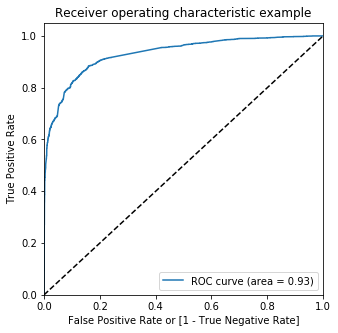

In [224]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 10A: Finding Optimal Cutoff Point

In [225]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.844243,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.065753,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.102425,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.983354,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.133816,9170,0,1,1,0,0,0,0,0,0,0,0


In [226]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.677181  0.964448  0.501391
0.2   0.2  0.844790  0.893344  0.815077
0.3   0.3  0.859385  0.866474  0.855047
0.4   0.4  0.869272  0.822241  0.898052
0.5   0.5  0.864878  0.751137  0.934480
0.6   0.6  0.853735  0.686647  0.955983
0.7   0.7  0.853892  0.661844  0.971414
0.8   0.8  0.845888  0.625052  0.981027
0.9   0.9  0.819680  0.540306  0.990640


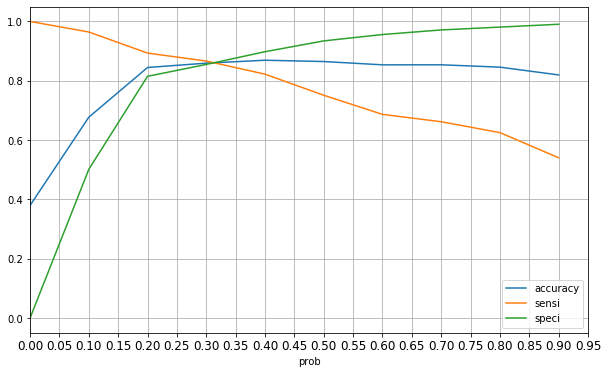

In [227]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.grid()
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [228]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.844243,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.065753,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.102425,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.983354,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.133816,9170,0,1,1,0,0,0,0,0,0,0,0,0


### Overall Accuracy

In [229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8593848085373509

In [230]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3380,  573],
       [ 323, 2096]], dtype=int64)

In [231]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8664737494832575

### Specificity

In [233]:
# Let us calculate specificity
TN / float(TN+FP)

0.855046799898811

In [234]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.14495320010118898


In [235]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7853128512551517


In [236]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9127734269511207


# Step-10B (Optional Step) Precision and Recall

In [237]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.844243,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.065753,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.102425,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.983354,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.133816,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [238]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','Precision','Recall','F1_Score'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    
    Precision=cm1[1,1]/(cm1[0,1]+cm1[1,1])
    Recall=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    F1_Score = 2*((Precision*Recall)/(Precision+Recall))
    
    cutoff_df.loc[i] =[ i ,Precision,Recall,F1_Score]
print(cutoff_df)

     prob  Precision    Recall  F1_Score
0.0   0.0   0.379630  1.000000  0.550336
0.1   0.1   0.542054  0.964448  0.694035
0.2   0.2   0.747234  0.893344  0.813783
0.3   0.3   0.785313  0.866474  0.823899
0.4   0.4   0.831522  0.822241  0.826855
0.5   0.5   0.875241  0.751137  0.808454
0.6   0.6   0.905177  0.686647  0.780912
0.7   0.7   0.934072  0.661844  0.774740
0.8   0.8   0.952741  0.625052  0.754868
0.9   0.9   0.972470  0.540306  0.694659


Add new Column final_predicted_PR for adding predictions for Precision Recall Method

In [239]:
y_train_pred_final['final_predicted_PR'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_PR
0,0,0.844243,7962,1,1,1,1,1,1,1,1,1,1,0,1,1
1,0,0.065753,5520,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.102425,1962,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.983354,1566,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.133816,9170,0,1,1,0,0,0,0,0,0,0,0,0,0


In [240]:
confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR)
confusion_new

array([[3550,  403],
       [ 430, 1989]], dtype=int64)

##### Precision
TP / TP + FP

In [241]:
Precision=confusion_new[1,1]/(confusion_new[0,1]+confusion_new[1,1])

In [242]:
Precision

0.8315217391304348

##### Recall
TP / TP + FN

In [243]:
Recall=confusion_new[1,1]/(confusion_new[1,0]+confusion_new[1,1])

In [244]:
Recall

0.8222405952873088

#### F1_Score

2*((PrecisionXRecall)/(Precision+Recall))

In [245]:
F1_Score = 2*((Precision*Recall)/(Precision+Recall))

In [246]:
F1_Score

0.8268551236749117

Using sklearn utilities for the same

In [247]:
from sklearn.metrics import precision_score, recall_score

In [248]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR)

0.8315217391304348

In [249]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR)

0.8222405952873088

## Precision and recall tradeoff

In [250]:
from sklearn.metrics import precision_recall_curve

In [251]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    1
 6368    1
 6369    0
 6370    1
 6371    0
 Name: final_predicted_PR, Length: 6372, dtype: int64)

In [252]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

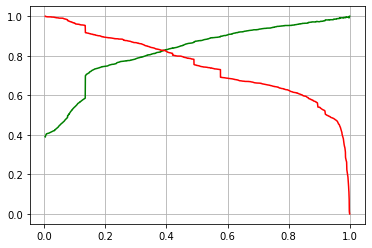

In [253]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

#### Drop final_predicted_PR which was just added for Precision Recall Metric

In [254]:
y_train_pred_final.drop(['final_predicted_PR'], axis=1, inplace=True)

# Step 11: Making predictions on the test set

In [255]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [256]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Ld_Sr_Direct Traffic,Ld_Sr_Google,Ld_Sr_Olark Chat,Ld_Sr_Organic Search,Lst_Act_L_A_Otr,Tags_Ringing,Tags_Will revert after reading the email,Lst_Ntbl_Act_SMS Sent
3504,-0.103815,0,0,0,1,0,1,0,0
4050,-0.881052,0,0,0,0,0,0,1,1
7201,0.424120,1,0,0,0,0,0,0,1
1196,-0.105648,0,0,0,1,0,1,0,0
8219,-0.428274,1,0,0,0,1,0,0,0


In [257]:
X_test_sm = sm.add_constant(X_test)

In [258]:
y_test_pred = res.predict(X_test_sm)

In [259]:
y_test_pred[:10]

3504    0.005533
4050    0.998397
7201    0.589109
1196    0.005523
8219    0.049906
8747    0.133816
9048    0.624447
6524    0.057424
7693    0.338858
8187    0.235333
dtype: float64

In [260]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [261]:
# Let's see the head
y_pred_1.head()

,0
3504,0.005533
4050,0.998397
7201,0.589109
1196,0.005523
8219,0.049906


In [262]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [263]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [264]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [265]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [266]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.005533
1,1,4050,0.998397
2,0,7201,0.589109
3,0,1196,0.005523
4,1,8219,0.049906


In [267]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [268]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,0,3504,0.005533
1,1,4050,0.998397
2,0,7201,0.589109
3,0,1196,0.005523
4,1,8219,0.049906


In [269]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [270]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,0,3504,0.005533,0
1,1,4050,0.998397,1
2,0,7201,0.589109,1
3,0,1196,0.005523,0
4,1,8219,0.049906,0


### Overall Accuracy - Test Set

In [271]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8678139875503479

In [272]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1452,  237],
       [ 124,  918]], dtype=int64)

In [273]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity - Test Set

In [274]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8809980806142035

### Specificity - Test Set

In [275]:
# Let us calculate specificity
TN / float(TN+FP)

0.8596802841918295

### FPR - Test Set

In [276]:
print(FP/ float(TN+FP))

0.14031971580817051


### Draw ROC - Test Set

In [277]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [278]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

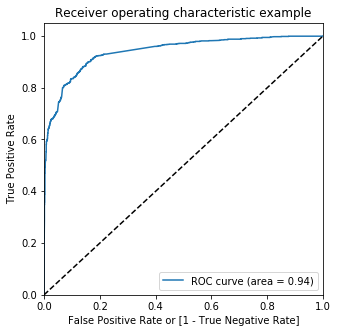

(array([0.        , 0.        , 0.        , ..., 0.99881587, 0.99940793,
        1.        ]),
 array([0.00000000e+00, 9.59692898e-04, 1.91938580e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99987381e+00, 9.99873810e-01, 9.99616609e-01, ...,
        1.31235357e-03, 1.27936775e-03, 1.22028954e-03]))

In [279]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

In [280]:
# Selecting the test dataset along with the Converted Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,0,3504,0.005533,0
1,1,4050,0.998397,1
2,0,7201,0.589109,1
3,0,1196,0.005523,0
4,1,8219,0.049906,0


In [281]:
# Selecting the train dataset along with the Converted Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.844243,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.065753,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.102425,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.983354,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.133816,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [282]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Converted_Prob','final_predicted']]

leads_train_pred.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,7962,0,0.844243,1
1,5520,0,0.065753,0
2,1962,0,0.102425,0
3,1566,1,0.983354,1
4,9170,0,0.133816,0


In [283]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head(5)

,Converted,Converted_Prob,LeadID,final_predicted
0,0,0.844243,7962,1
1,0,0.065753,5520,0
2,0,0.102425,1962,0
3,1,0.983354,1566,1
4,0,0.133816,9170,0


In [284]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6372, 4)
(2731, 4)
(9103, 4)


In [285]:
# Ensuring the ProspectIds are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9103

In [286]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,Converted_Prob,LeadID,final_predicted,Lead_Score
0,0,0.844243,7962,1,84
1,0,0.065753,5520,0,7
2,0,0.102425,1962,0,10
3,1,0.983354,1566,1,98
4,0,0.133816,9170,0,13


## Features with High Coeffecients

In [287]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params.sort_values(ascending = False)

Tags_Will revert after reading the email    4.30
Lst_Ntbl_Act_SMS Sent                       1.83
Total Time Spent on Website                 0.99
Lst_Act_L_A_Otr                            -0.63
Ld_Sr_Olark Chat                           -2.18
Ld_Sr_Google                               -2.79
Ld_Sr_Organic Search                       -2.96
Ld_Sr_Direct Traffic                       -3.07
Tags_Ringing                               -3.31
dtype: float64

In [288]:
#Top3 positive coeff
new_params.sort_values(ascending = False).head(3)

Tags_Will revert after reading the email   4.30
Lst_Ntbl_Act_SMS Sent                      1.83
Total Time Spent on Website                0.99
dtype: float64

In [289]:
#Top3 negative coeff
new_params.sort_values(ascending = True).head(3)

Tags_Ringing           -3.31
Ld_Sr_Direct Traffic   -3.07
Ld_Sr_Organic Search   -2.96
dtype: float64